Developed by: AmirMasoud Nourollah  <br>
Instructor: Dr. Hoda Mashayekhi

In [ ]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 63.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=dca0b6bcb34dac93ff42b717f55674cdae6a871bd886175a883adbf4ad0ff274
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.context import SparkContext
sc = SparkContext('local', 'PySparkTutorial')

In [ ]:
if ('sc' in locals() or 'sc' in globals()):
    print('<<<<<!!!!! It seems that you are running in a Colab Apache Spark Notebook. !!!!!>>>>>')

<<<<<!!!!! It seems that you are running in a Colab Apache Spark Notebook. !!!!!>>>>>


In [ ]:
locals()

{'In': ['',
  "get_ipython().system(' pip install pyspark')",
  "from pyspark.context import SparkContext\nsc = SparkContext('local', 'PySparkTutorial')",
  "if ('sc' in locals() or 'sc' in globals()):\n    print('<<<<<!!!!! It seems that you are running in a Colab Apache Spark Notebook. !!!!!>>>>>')",
  'locals()',
  'a = 2',
  'locals()'],
 'Out': {4: {...}},
 'SparkContext': pyspark.context.SparkContext,
 '_': {...},
 '_4': {...},
 '__': '',
 '___': '',
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__loader__': None,
 '__name__': '__main__',
 '__package__': None,
 '__spec__': None,
 '_dh': ['/content'],
 '_exit_code': 0,
 '_i': 'a = 2',
 '_i1': '! pip install pyspark',
 '_i2': "from pyspark.context import SparkContext\nsc = SparkContext('local', 'PySparkTutorial')",
 '_i3': "if ('sc' in locals() or 'sc' in globals()):\n    print('<<<<<!!!!! It seems th

In [ ]:
a = [1, 2, 3, 4, 5]

In [ ]:
rdd = sc.parallelize(a)

In [ ]:
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
t = rdd.map(lambda x: x * 5).collect()

In [ ]:
type(rdd)

pyspark.rdd.RDD

In [ ]:
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
t

[5, 10, 15, 20, 25]

In [ ]:
rdd.collect()[0]

1

In [ ]:
rdd2 = rdd.map(lambda x: x + 2).collect()

In [ ]:
rdd2[1]

4

In [ ]:
filter = rdd.filter(lambda x: x % 2 == 0)

In [ ]:
type(filter)

pyspark.rdd.PipelinedRDD

In [ ]:
filter.collect()

[2, 4]

In [ ]:
filter.collect()[0]

2

In [ ]:
print(f"Type of rdd: {type(rdd)}, \n Type of rdd2: {type(rdd2)}, \n Type of filter: {type(filter)}")

Type of rdd: <class 'pyspark.rdd.RDD'>, 
 Type of rdd2: <class 'list'>, 
 Type of filter: <class 'pyspark.rdd.PipelinedRDD'>


In [ ]:
nums = [10, 1, 2, 9, 3, 4, 5, 6, 7]
kv = [(10,"z1"), (1,"z2"), (2,"z3"), (9,"z4"), (3,"z5"), (4,"z6"), (5,"z7"), (6,"z8"), (7,"z9")]

In [ ]:
rdd3 = sc.parallelize(nums)
result = sc.parallelize(nums).collect()

In [ ]:
print(f"Type of rdd: {type(rdd3)}, \n Type of rdd2: {type(result)}")

Type of rdd: <class 'pyspark.rdd.RDD'>, 
 Type of rdd2: <class 'list'>


In [ ]:
sc.parallelize(nums).takeOrdered(5, key=lambda x: -x)

[10, 9, 7, 6, 5]

In [ ]:
sc.parallelize(nums).takeOrdered(2, key=lambda x: x)

[1, 2]

In [ ]:
sc.parallelize(nums).takeOrdered(5, key=lambda x: -x)

[10, 9, 7, 6, 5]

In [ ]:
sc.parallelize(kv).takeOrdered(2, key=lambda x: x[0])

[(1, 'z2'), (2, 'z3')]

In [ ]:
sumAndCount = rdd3.map(lambda x: (x, 1)).fold((0, 0), (lambda x, y: (x[0] + y[0], x[1] + y[1])))

In [ ]:
sumAndCount

(47, 9)

In [ ]:
avg = float(sumAndCount[0]) / float(sumAndCount[1])
avg

5.222222222222222

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
! wget https://github.com/IBM/coursera/raw/master/hmp.parquet

--2022-05-30 05:30:49--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/raw/master/hmp.parquet [following]
--2022-05-30 05:30:50--  https://github.com/IBM/claimed/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/hmp.parquet [following]
--2022-05-30 05:30:50--  https://raw.githubusercontent.com/IBM/claimed/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/oc

In [ ]:
! ls

hmp.parquet  sample_data


In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.getOrCreate()

In [ ]:
df = spark.read.parquet('hmp.parquet')

In [ ]:
df.createOrReplaceTempView('df')

In [ ]:
df

DataFrame[x: int, y: int, z: int, source: string, class: string]

In [ ]:
df.show()

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|
| 20| 50| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 50| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 35|Accelerometer-201...|Brush_teeth|
| 21| 51| 33|Accelerometer-201...|Brush_teeth|
| 20| 50| 34|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 20| 51| 35|Accelerometer-201...|Brush_teeth|
| 18| 49| 34|Accelerometer-201...|Brush_teeth|
| 19| 48| 34|Accelerometer-201...|Brush_teeth|
| 16| 53| 34|Accelerometer-201...|Brush_teeth|
| 18| 52| 35|

In [ ]:
df.describe()

DataFrame[summary: string, x: string, y: string, z: string, source: string, class: string]

In [ ]:
dataFrame = df.toPandas()

In [ ]:
dataFrame['class'].unique()

array(['Brush_teeth', 'Climb_stairs', 'Comb_hair', 'Descend_stairs',
       'Drink_glass', 'Eat_meat', 'Eat_soup', 'Getup_bed', 'Liedown_bed',
       'Pour_water', 'Sitdown_chair', 'Standup_chair', 'Use_telephone',
       'Walk'], dtype=object)

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="class", outputCol="classIndex")
encoder = OneHotEncoder(inputCol="classIndex", outputCol="categoryVec")
vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

pipeline = Pipeline(stages=[indexer, encoder, vectorAssembler, normalizer])
model = pipeline.fit(df)
prediction = model.transform(df)
prediction.show()

+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
|  x|  y|  z|              source|      class|classIndex|   categoryVec|        features|       features_norm|
+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[21.0,52.0,34.0]|[0.19626168224299...|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,51.0,34.0]|[0.20560747663551...|
|

In [ ]:
dataFrame = prediction.toPandas()

In [ ]:
dataFrame['classIndex'].unique()

array([ 6.,  4.,  9., 10.,  2.,  5., 13.,  1., 12.,  3.,  8.,  7., 11.,
        0.])

In [ ]:
dataFrame["features_norm"][0]

DenseVector([0.2075, 0.4623, 0.3302])

In [ ]:
dataFrame['class'].unique()

array(['Brush_teeth', 'Climb_stairs', 'Comb_hair', 'Descend_stairs',
       'Drink_glass', 'Eat_meat', 'Eat_soup', 'Getup_bed', 'Liedown_bed',
       'Pour_water', 'Sitdown_chair', 'Standup_chair', 'Use_telephone',
       'Walk'], dtype=object)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df)
predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.4020618068072166


In [ ]:
kmeans = KMeans(featuresCol='features_norm').setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, normalizer, kmeans])
model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.24303667657985278


In [ ]:
from pyspark.sql.functions import col
df_denormalized = df.select([col('*'),(col('x')*10)]).drop('x').withColumnRenamed('(x * 10)','x')

In [ ]:
df_denormalized

DataFrame[y: int, z: int, source: string, class: string]

In [ ]:
kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df_denormalized)
predictions = model.transform(df_denormalized)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5867136488435384


In [ ]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, gmm])

model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.7/dist-packages/py4j/clientserver.py", line 475, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
! wget https://github.com/sonpn82/Scalable-Machine-Learning-on-Big-Data-using-Apache-Spark/raw/master/washing.parquet

--2022-05-30 06:08:40--  https://github.com/sonpn82/Scalable-Machine-Learning-on-Big-Data-using-Apache-Spark/raw/master/washing.parquet
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sonpn82/Scalable-Machine-Learning-on-Big-Data-using-Apache-Spark/master/washing.parquet [following]
--2022-05-30 06:08:40--  https://raw.githubusercontent.com/sonpn82/Scalable-Machine-Learning-on-Big-Data-using-Apache-Spark/master/washing.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112048 (109K) [application/octet-stream]
Saving to: ‘washing.parquet’

washing.parquet     100%[===================>] 109.4

In [ ]:
df = spark.read.parquet('washing.parquet')
df.count()

2058

In [ ]:
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [ ]:
df.createOrReplaceTempView('washing')
spark.sql('Select * from washing').show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [ ]:
result = spark.sql('select voltage from washing where voltage is not null')

In [ ]:
result.show()

+-------+
|voltage|
+-------+
|    236|
|    235|
|    228|
|    236|
|    233|
|    226|
|    235|
|    220|
|    225|
|    239|
|    230|
|    236|
|    244|
|    235|
|    234|
|    224|
|    225|
|    223|
|    236|
|    226|
+-------+
only showing top 20 rows



In [ ]:
result_array = result.rdd.map(lambda row : row.voltage).sample(False, 0.1).collect()

In [ ]:
result_array

[239,
 239,
 236,
 231,
 223,
 229,
 237,
 225,
 222,
 221,
 222,
 235,
 250,
 224,
 232,
 221,
 221,
 238,
 242,
 232,
 225,
 220,
 250,
 222,
 227,
 236,
 232,
 232,
 247,
 255,
 226,
 233,
 221,
 220,
 238,
 238,
 224,
 232,
 233,
 235,
 235,
 222,
 238,
 236,
 220,
 234,
 223,
 227,
 227,
 234]

In [ ]:
result_array[:15]

[239, 239, 236, 231, 223, 229, 237, 225, 222, 221, 222, 235, 250, 224, 232]

In [ ]:
import matplotlib.pyplot as plt

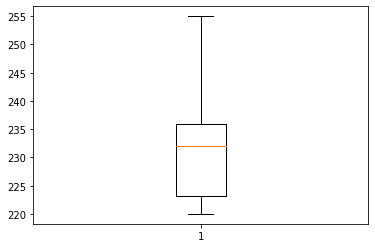

In [ ]:
plt.boxplot(result_array)
plt.show()

In [ ]:
result = spark.sql('select voltage, ts from washing where voltage is not null order by ts asc')
result_rdd = result.rdd.sample(False, 0.1).map(lambda row : (row.ts, row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

In [ ]:
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808740927, 1547808776948, 1547808788955, 1547808794957, 1547808849030, 1547808864037, 1547808873042, 1547808876043, 1547808885074, 1547808918094, 1547808987166, 1547808993170, 1547808996171, 1547809050217, 1547809065223]
[235, 235, 236, 224, 238, 235, 234, 221, 226, 222, 237, 253, 255, 234, 222]


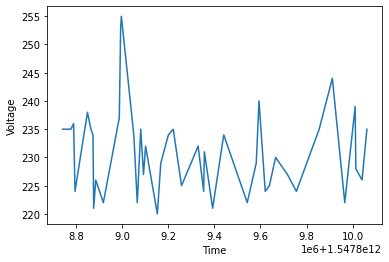

In [ ]:
plt.plot(result_array_ts, result_array_voltage)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()

In [ ]:
spark.sql('select min(ts), max(ts) from washing').show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



In [ ]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")

In [ ]:
result_rdd = result.rdd.map(lambda row: (row.ts, row.voltage))

In [ ]:
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

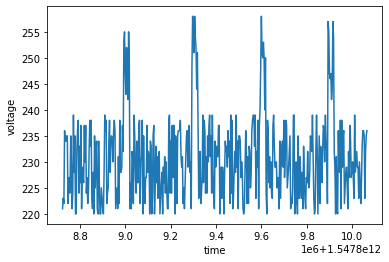

In [ ]:
plt.plot(result_array_ts, result_array_voltage)
plt.xlabel('time')
plt.ylabel('voltage')
plt.show()

In [ ]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

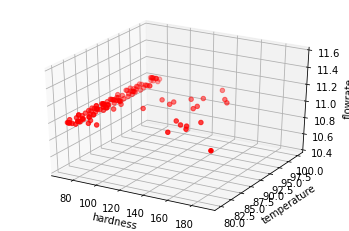

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness, result_array_temperature, result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

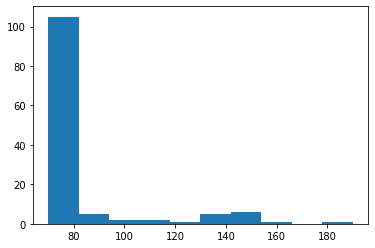

In [ ]:
plt.hist(result_array_hardness)
plt.show()

In [ ]:
import sklearn